In [1]:
# For Data Manipulation
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To visualize the loops
from tqdm import tqdm

# For file handeling and os operations
import os

# Weights and Biases for logging and artifacts
!pip install wandb -qqq
import wandb
wandb.login()

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

wandb: Currently logged in as: firemines. Use `wandb login --relogin` to force relogin


In [2]:
# Function to display images

def display_multiple_samples(n_rows,n_cols):
    # Get main folder path
    main_folder = "../ai_project/dataset"
    # Get types of handGestures
    types_of_hand_gestures = list(os.listdir("../ai_project/dataset"))
    # Iterate though directory and plot images
    for handGestures in types_of_hand_gestures:
        # Basmati's file name starts from small 'b'
        hand_gestures_folder = handGestures
        # Create a subplot
        figure,ax = plt.subplots(n_rows,n_cols,figsize=(20,10))
        plt.suptitle(handGestures.upper(),fontsize=20)
        for n in range((n_rows*n_cols)):
            # Read image
            hand_gestures_image_name = f"{rice} ({int(np.random.randint(1,150))}).jpg"
            hand_gestures_image_path = os.path.join(main_folder,hand_gestures_folder,hand_gestures_image_name)
            image = plt.imread(hand_gestures_image_path)
            # Display image
            ax.ravel()[n].imshow(image)
            ax.ravel()[n].set_axis_off()
            
        # Show the plot
        plt.tight_layout()
        plt.show()

In [3]:
# display_multiple_samples(5,5)

In [4]:
root_path = "../ai_project/dataset"

closed_fist = pd.DataFrame({"filepath":[os.path.join(root_path,"Closed_fist",os.listdir("../ai_project/dataset/Closed_fist")[i]) for i in tqdm(range(1138),position=0,leave=True)],'label':1})
finger_guns = pd.DataFrame({"filepath":[os.path.join(root_path,"Finger_guns",os.listdir("../ai_project/dataset/Finger_guns")[i]) for i in tqdm(range(945),position=0,leave=True)],'label':2})
open_palm = pd.DataFrame({"filepath":[os.path.join(root_path,"Open_palm",os.listdir("../ai_project/dataset/Open_palm")[i]) for i in tqdm(range(1262),position=0,leave=True)],'label':3})
peace_sign = pd.DataFrame({"filepath":[os.path.join(root_path,"Peace_sign",os.listdir("../ai_project/dataset/Peace_sign")[i]) for i in tqdm(range(1029),position=0,leave=True)],'label':4})
pinky = pd.DataFrame({"filepath":[os.path.join(root_path,"Pinky",os.listdir("../ai_project/dataset/Pinky")[i]) for i in tqdm(range(916),position=0,leave=True)],'label':5})

pointing = pd.DataFrame({"filepath":[os.path.join(root_path,"Pointing",os.listdir("../ai_project/dataset/Pointing")[i]) for i in tqdm(range(942),position=0,leave=True)],'label':6})
rocknroll = pd.DataFrame({"filepath":[os.path.join(root_path,"Rocknroll",os.listdir("../ai_project/dataset/Rocknroll")[i]) for i in tqdm(range(951),position=0,leave=True)],'label':7})
spiderman = pd.DataFrame({"filepath":[os.path.join(root_path,"Spiderman",os.listdir("../ai_project/dataset/Spiderman")[i]) for i in tqdm(range(949),position=0,leave=True)],'label':8})
spock = pd.DataFrame({"filepath":[os.path.join(root_path,"Spock",os.listdir("../ai_project/dataset/Spock")[i]) for i in tqdm(range(974),position=0,leave=True)],'label':9})
thumbs_up = pd.DataFrame({"filepath":[os.path.join(root_path,"Thumbs_up",os.listdir("../ai_project/dataset/Thumbs_up")[i]) for i in tqdm(range(976),position=0,leave=True)],'label':10})

df = pd.concat([closed_fist,finger_guns,open_palm,peace_sign,pinky,pointing,rocknroll,spiderman,spock,thumbs_up],axis=0)
df['label'] = df['label'].astype(str)
df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 976/976 [00:00<00:00, 1211.35it/s]


,filepath,label
0,../ai_project/dataset\Closed_fist\20220605_164...,1
1,../ai_project/dataset\Closed_fist\20220605_164...,1
2,../ai_project/dataset\Closed_fist\20220605_164...,1
3,../ai_project/dataset\Closed_fist\20220605_164...,1
4,../ai_project/dataset\Closed_fist\20220605_164...,1


In [5]:
from sklearn.utils import shuffle

df = shuffle(df)
df.reset_index(drop=True,inplace=True)
df.head()

,filepath,label
0,../ai_project/dataset\Spock\IMG_2236.JPG,9
1,../ai_project/dataset\Finger_guns\IMG_1406.JPG,2
2,../ai_project/dataset\Finger_guns\20220605_165...,2
3,../ai_project/dataset\Closed_fist\Closed_fist ...,1
4,../ai_project/dataset\Closed_fist\Closed_fist ...,1


In [6]:
from sklearn.model_selection import train_test_split
raw_train_df, valid_df = train_test_split(df, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = df['label'])
print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])

train 7561 validation 2521


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
datagen=ImageDataGenerator(rescale=1./255,
                           shear_range=0.2,
                           zoom_range=0.2,
                           validation_split=0.2)

train_generator=datagen.flow_from_dataframe(
                                            dataframe=df,
                                            x_col="filepath",
                                            y_col="label",
                                            subset="training",
                                            batch_size=32,
                                            shuffle=True,
                                            class_mode="categorical",
                                            target_size=(224,224))

test_generator=datagen.flow_from_dataframe(
                                           dataframe=df,
                                           x_col="filepath",
                                           y_col='label',
                                           batch_size=32,
                                           subset='validation',
                                           shuffle=False,
                                           class_mode='categorical',
                                           target_size=(224,224))

# used a fixed dataset for evaluating the algorithm
test_X, test_Y = next(datagen.flow_from_dataframe(valid_df, 
                                                  x_col="filepath",
                                                  y_col='label',
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  batch_size = 1024)) # one big batch

Found 8064 validated image filenames belonging to 10 classes.
Found 2016 validated image filenames belonging to 10 classes.
Found 2521 validated image filenames belonging to 10 classes.


(224, 224, 3)


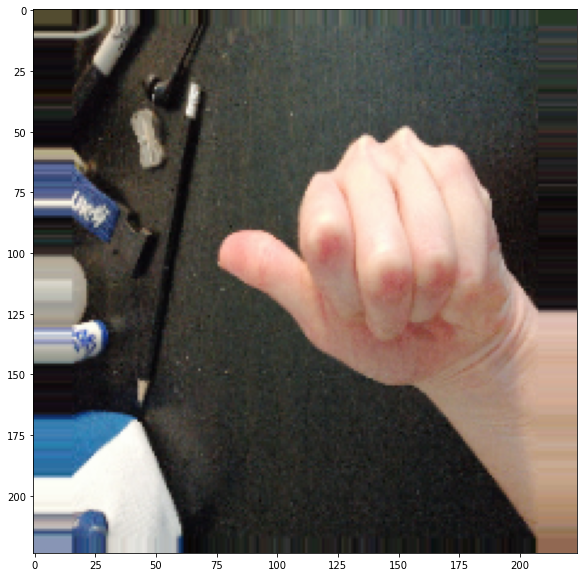

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
(224, 224, 3)


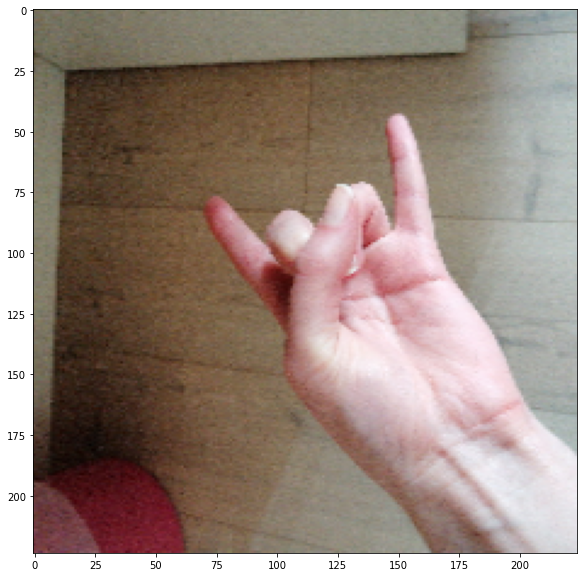

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(224, 224, 3)


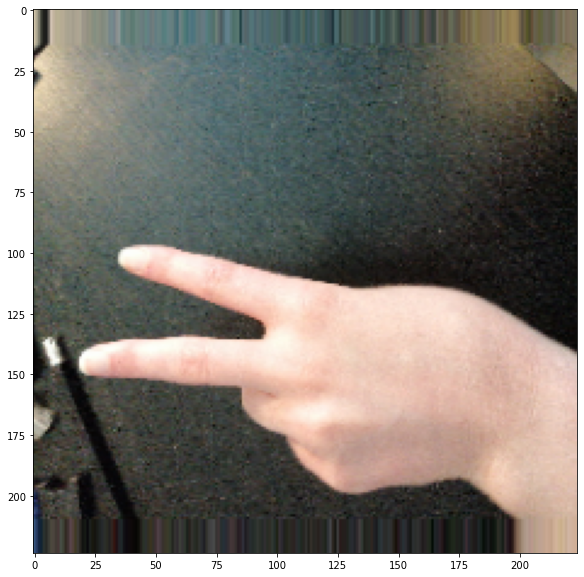

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
(224, 224, 3)


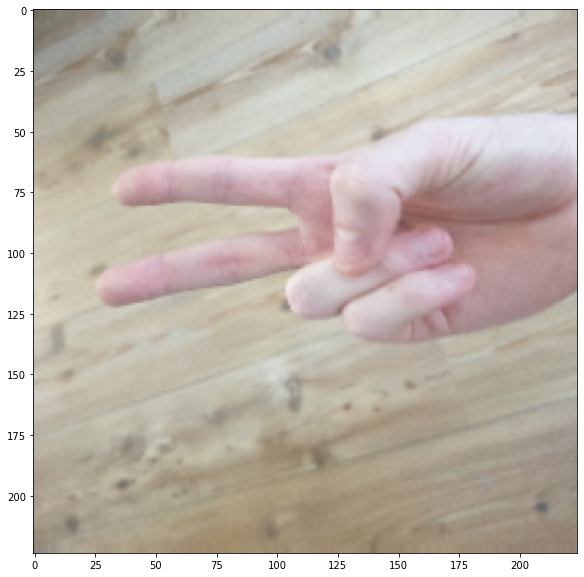

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
(224, 224, 3)


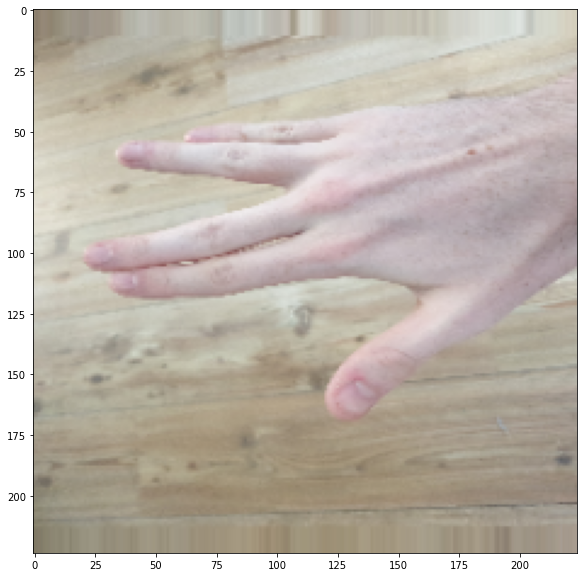

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
for batch in train_generator:
    images = batch[0]
    labels = batch[1]
    for i in range(5):
        plt.figure(figsize=(20,10))
        plt.imshow(images[i])
        print(images[i].shape)
        plt.show()
        print(labels[i])
    break

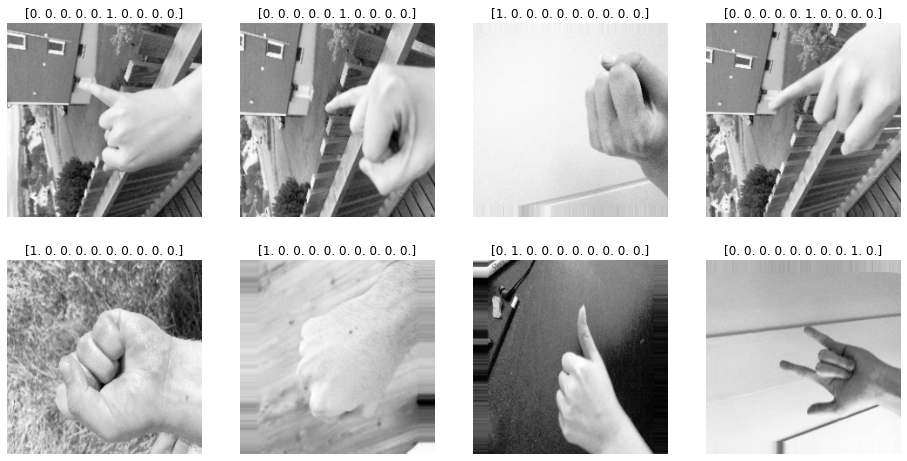

In [10]:
t_x, t_y = next(train_generator)
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,1], cmap = 'Greys_r')
    c_ax.set_title(c_y)
    c_ax.axis('off')

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from tensorflow.keras.models import Model

In [12]:
vgg = VGG16(input_shape =  t_x.shape[1:], weights='imagenet',include_top=False)
print(t_x.shape[1:])

(224, 224, 3)


In [13]:
in_lay = Input(t_x.shape[1:])
vgg.trainable = False

# pt_depth = vgg.layers[0].compute_output_shape([224,224,3])
pt_features = vgg(in_lay)
pt_depth = vgg.get_output_shape_at(0)[-1]
from keras.layers import BatchNormalization
bn_features = BatchNormalization()(pt_features)

# here we do an attention mechanism to turn pixels in the GAP on an off

attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn_features)
attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = LocallyConnected2D(1, kernel_size = (1,1), 
                                padding = 'valid', 
                                activation = 'sigmoid')(attn_layer)

# fan it out to all of the channels
up_c2_w = np.ones((1, 1, 1, pt_depth))
up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', 
               activation = 'linear', use_bias = False, weights = [up_c2_w])
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)

# to account for missing values from the attention model
gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
gap_dr = Dropout(0.5)(gap)
dr_steps = Dropout(0.25)(Dense(1024, activation = 'elu')(gap_dr))
out_layer = Dense(1, activation = 'linear')(dr_steps) # linear is what 16bit did
hand_gesture_model = Model(inputs = [in_lay], outputs = [out_layer])
print(out_layer)
from keras.metrics import mean_absolute_error



hand_gesture_model.compile(optimizer = 'adam', loss = 'mse',
                           metrics = ['binary_accuracy'])

hand_gesture_model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_1/BiasAdd:0', description="created by layer 'dense_1'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 7, 7, 512)   2048        ['vgg16[0][0]']                  
 alization)                                  

In [14]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('hand_gesture')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [ ]:
hand_gesture_model.fit_generator(train_generator, 
                                  validation_data = (test_X, test_Y), 
                                  epochs = 10, 
                                  callbacks = callbacks_list)

Epoch 1/10


In [ ]:
# load the best version of the model
hand_gesture_model.load_weights(weight_path)

In [ ]:
#get the attention layer since it is the only one with a single output dim
for attn_layer in hand_gesture_model.layers:
    c_shape = attn_layer.get_output_shape_at(0)
    if len(c_shape)==4:
        if c_shape[-1]==1:
            print(attn_layer)
            break
print(attn_layer.get_input_at(0))
#print(hand_gesture_model.get_input_at(0))



In [ ]:

# predict probabilities for test set
yhat_probs = hand_gesture_model.predict(test_X, verbose=0)
# predict crisp classes for test set
yhat_classes = hand_gesture_model.predict_classes(test_X, verbose=0)

In [ ]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
ypred = hand_gesture_model.predict(test_X)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

#for i in range(len(ypred)):
#    if np.argmax(ypred[i]) == np.argmax(test_Y[i]):
#        accurate += 1
#        accurateindex.append(i)
#    else:
#        wrongindex.append(i)
#        
#    total += 1
    
y_test_arg=np.argmax(test_Y,axis=1)
Y_pred = np.argmax(hand_gesture_model.predict(test_X),axis=1)
Predict = hand_gesture_model.predict(test_X)
print(y_test_arg)
print(Y_pred)

#pred = np.array ([])
#label = np.array ([])

#for x, y in zip(test_X, test_Y):
#    pred = np.concatenate([pred, np.argmax(hand_gesture_model.predict(x), axis=0)])
#    label = np.concatenate([label, np.argmax(y, axis=0)])

#history = hand_gesture_model.fit(train_generator, validation_data=(test_X, test_Y),epochs = 10, 
#                                  callbacks = callbacks_list)



#Predict = Predict[:, 0]
#Predict = np.argmax(Predict)
#print(Predict)

print('Confusion Matrix')
print(confusion_matrix(label, pred))

#print('Accuracy')
#print(accuracy_score(y_test_arg, Y_pred)) 

#print('Precision')
#print(precision_score(y_test_arg, Y_pred, pos_label='positive', average='micro')) 

#print('Recall')
#print(recall_score(y_test_arg, Y_pred, pos_label='positive', average='micro')) 

#print('F1 score')
#print(f1_score(y_test_arg, Y_pred, pos_label='positive', average='micro')) 

#score = hand_gesture_model.evaluate(test_X, test_Y, verbose=0)
#print("Test loss:", score[0])
#print("Test accuracy:", score[1])
    
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg, Y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg, Y_pred, pos_label='positive', average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg, Y_pred, pos_label='positive', average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg, Y_pred, pos_label='positive', average='micro')
print('F1 score: %f' % f1)
    
#print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
#print('Accuracy:', round(accurate/total*100, 3), '%')

In [ ]:
import numpy as np
rounded_labels=np.argmax(test_Y, axis=0)
rounded_labels[0]


# accuracy: (tp + tn) / (p + n)
#accuracy = accuracy_score(test_Y, yhat_classes)
#print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_Y, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_Y, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_Y, yhat_classes)
print('F1 score: %f' % f1)

In [ ]:
import keras.backend as K
rand_idx = np.random.choice(range(len(test_X)), size = 6)

in_lay = Input(t_x.shape[1:])
#vgg.trainable = False
hand_gesture_model = Model(inputs = [in_lay], outputs = [out_layer])

# pt_depth = vgg.layers[0].compute_output_shape([224,224,3])
pt_features = vgg(in_lay)

#print(hand_gesture_model.get_input_at(0))
print(K.learning_phase())
print(attn_layer.get_input_at(0))

attn_func = K.function(inputs = 
                       [hand_gesture_model.get_input_at(0), K.learning_phase()],
                        outputs = hand_gesture_model.get_output_at(0)
                      )
fig, m_axs = plt.subplots(len(rand_idx), 2, figsize = (8, 4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for c_idx, (img_ax, attn_ax) in zip(rand_idx, m_axs):
    cur_img = test_X[c_idx:(c_idx+1)]
    #print(cur_img)
    #print(attn_func([cur_img,0]))
    attn_img = attn_func([cur_img,0])[0]
    img_ax.imshow(cur_img[0,:,:,0], cmap = 'bone')
    print(attn_img)
    attn_ax.imshow(attn_img[0, :, :, 0], cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')
    img_ax.set_title('Hand Image\n')
    pred_hand = hand_gesture_model.predict(cur_img)
    attn_ax.set_title('Attention Map\nPred:%2.fY' % (pred_hand))
fig.savefig('attention_map.png', dpi = 300)

In [ ]:
# Donot train the existing weights
for layer in vgg.layers:
    layer.trainable = False


In [ ]:
# Flatten the last layer
x = Flatten()(vgg.output)

# Pass the flatten layer to final output layer
prediction = Dense(units=10,activation='softmax')(x)

# Create model
model = Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.summary()

In [ ]:
# Initialize a run
run = wandb.init(project='hand_gesture_types_classification',
                 config={
                     "batch_size":32,
                     "epochs":50,
                     "loss_function":"BinaryCrossentropy",
                 },name='training_logs')
# we will use the below variable to configure our training
config = wandb.config

In [ ]:
model.compile(loss=config.loss_function,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from wandb.keras import WandbCallback

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=config.epochs,
                              validation_data=(test_generator),
                              callbacks=[WandbCallback()])